In [1]:
import scipy as sp
import numpy as np
from scipy.integrate import odeint
from matplotlib import use
use('nbagg')
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import scipy.linalg as la


In [2]:
def func (x, t,omega):
    I=10
    Ip=0
    K1=50000
    K2=50000
    gama=1
    F=sp.transpose(sp.array([0,((I-Ip)/I)*gama*omega**2*(sp.cos(omega*t)), 0 ,((I-Ip)/I)*gama*omega**2*(sp.sin(omega*t))]))
    A=sp.array([[0, 1, 0, 0],
               [-K1/I, 0, 0, -Ip*omega/I],
               [0, 0, 0, 1],
               [0,Ip*omega/I, -K2/I, 0]])
    
    a1,a2,b1,b2=x
    dxdt=A @ x + F
    return dxdt

In [3]:
z0=[0,0,0,0]
n=10000
t=sp.linspace(0,10,n)

In [4]:
def calc(omega):
    sol=odeint(func, z0,t,args=(omega,))
    plt.plot( (sol[:,0]),(sol[:,2]))
    plt.figure()

    plt.plot( t, sol[:,2])
    plt.figure()

    plt.plot( t,sol[:,0])
    plt.show()

<IPython.core.display.Javascript object>


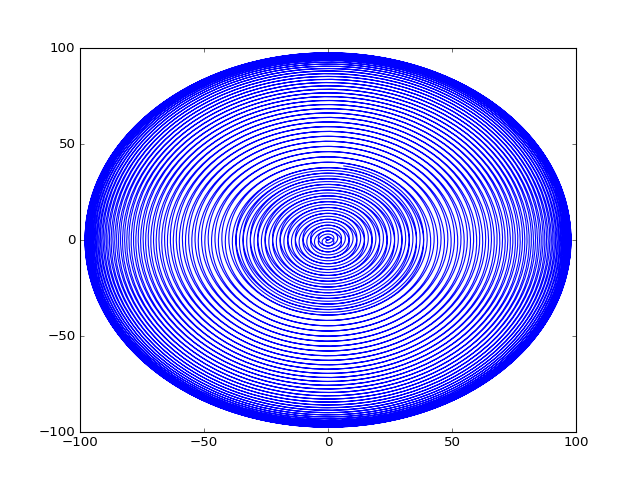

<IPython.core.display.Javascript object>


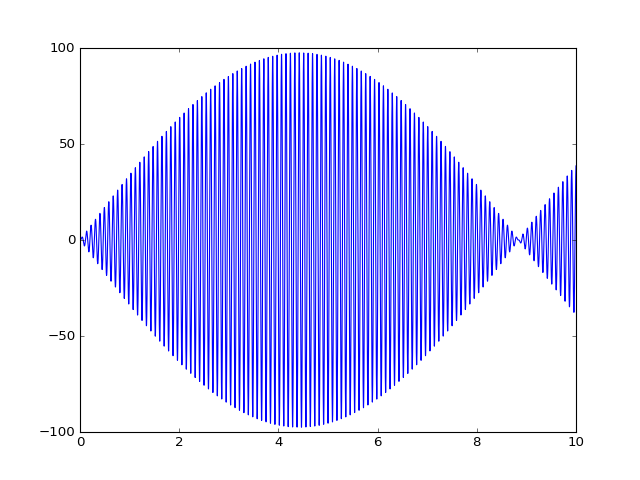

<IPython.core.display.Javascript object>


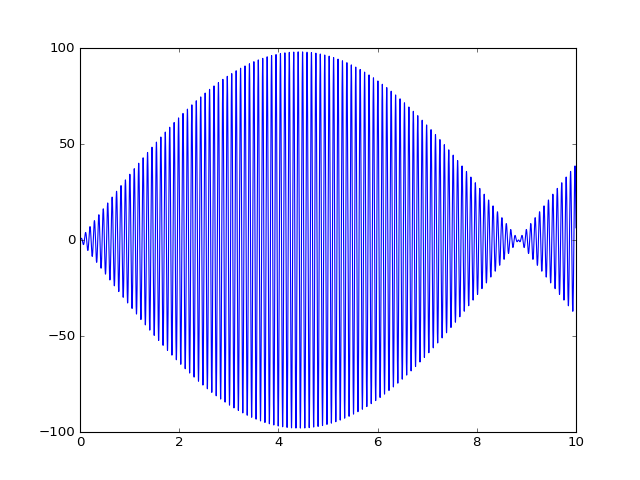

In [5]:
interact(calc, omega=(0, (50000/10)**.5, 10))